In [2]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

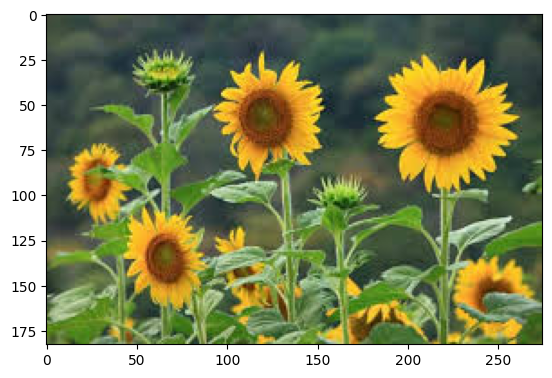

In [16]:
img_dir = f"/Users/lucky/projects/OpenCV-Experiments/data/Images/sunflower.jpg"
img = cv.imread(img_dir)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)

In [21]:
def plot_images(original, noisy, filtered, noise_type='Noise Image', filter_type='Filtered Image'):
    fig, axes = plt.subplots(1, 3, figsize=(12, 6))
    
    axes[0].imshow(original)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    axes[1].imshow(noisy)
    axes[1].set_title(noise_type)
    axes[1].axis('off')
    
    axes[2].imshow(filtered)
    axes[2].set_title(filter_type)
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()

## Salt & Pepper Noise Removal Experiment with Median Filter

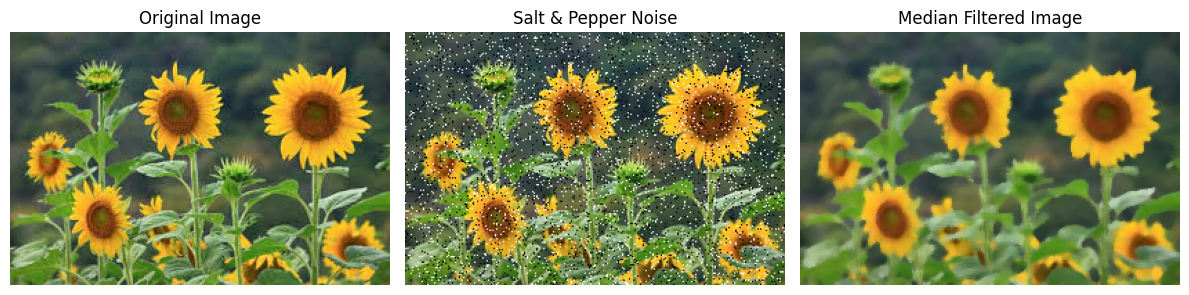

In [23]:
def add_salt_pepper_noise(image, noise_ratio=0.05):
    # Create a copy of the original image
    noisy_image = image.copy()
    # Get image dimensions
    height, width = image.shape[:2]
    # Calculate number of pixels to add noise to
    num_noise_pixels = int(height * width * noise_ratio)
    # Generate random coordinates for noise pixels
    noise_coords = np.random.randint(0, height, num_noise_pixels), np.random.randint(0, width, num_noise_pixels)
    # Randomly assign salt (255) or pepper (0) noise
    salt_or_pepper = np.random.randint(0, 2, num_noise_pixels)
    # Apply noise to the image
    for i in range(num_noise_pixels):
        y, x = noise_coords[0][i], noise_coords[1][i]
        if salt_or_pepper[i] == 0: noisy_image[y, x] = 0  # Pepper (black)
        else: noisy_image[y, x] = 255  # Salt (white)
    return noisy_image

def apply_median_filter(image, kernel_size=3):
    return cv.medianBlur(image, kernel_size)

saltnpepper_noisy_img = add_salt_pepper_noise(img, noise_ratio=0.1)
median_filtered_img = apply_median_filter(saltnpepper_noisy_img, kernel_size=5)

plot_images(img, saltnpepper_noisy_img, median_filtered_img, noise_type='Salt & Pepper Noise', filter_type='Median Filtered Image')

## Gussian Noise Removal Experiment with Gaussian Blur

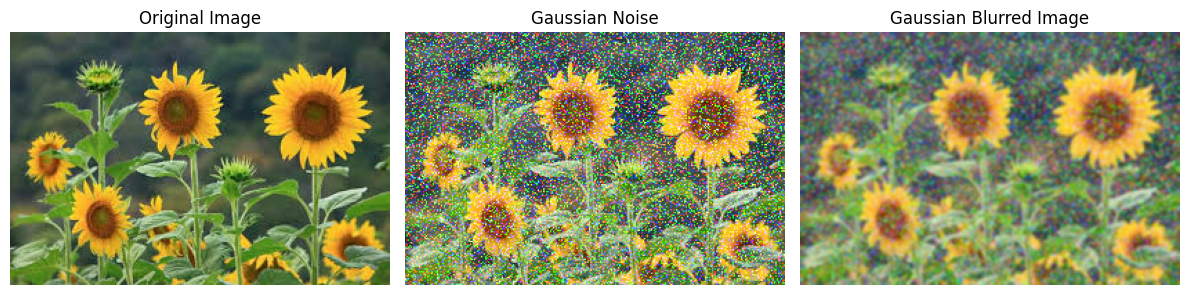

In [29]:
def add_gaussian_noise(image, mean=0, sigma=25):
    # Generate Gaussian noise
    gaussian_noise = np.random.normal(mean, sigma, image.shape).astype(np.uint8)
    # Add noise to the image
    noisy_image = cv.add(image, gaussian_noise)
    return noisy_image

def apply_gaussian_blur(image, kernel_size=5):
    return cv.GaussianBlur(image, (kernel_size, kernel_size), 0)

gaussian_noisy_img = add_gaussian_noise(img, mean=0, sigma=1)
gaussian_blurred_img = apply_gaussian_blur(gaussian_noisy_img, kernel_size=5)

plot_images(img, gaussian_noisy_img, gaussian_blurred_img, noise_type='Gaussian Noise', filter_type='Gaussian Blurred Image')